In [2]:
import spacy

In [3]:
nlp=spacy.blank("en")

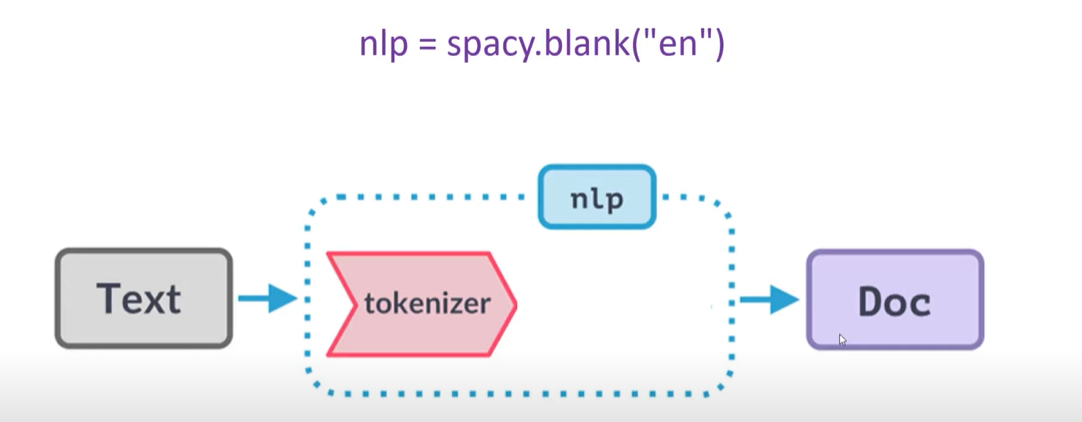

In [4]:
doc=nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 20$ per plate.")
for token in doc:
    print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
20
$
per
plate
.


In [5]:
doc=nlp('''"Let's go to N.Y.!"''')
for token in doc:
    print(token)

"
Let
's
go
to
N.Y.
!
"


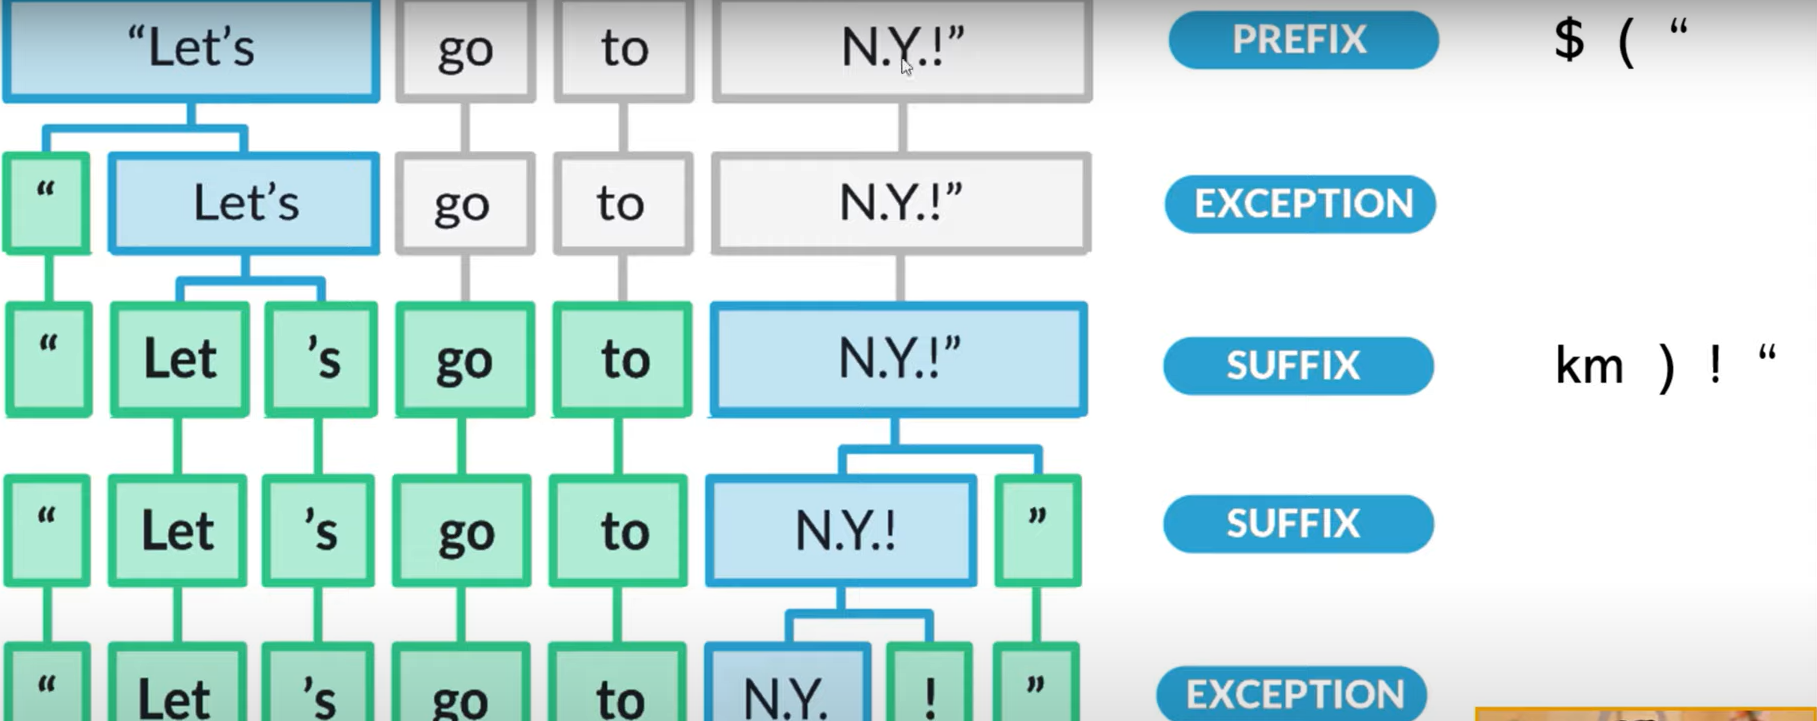

In [6]:
type(token)

spacy.tokens.token.Token

In [7]:
type(doc)

spacy.tokens.doc.Doc

In [8]:
type(nlp)

spacy.lang.en.English

In [9]:
abc=doc[1:5]
type(abc)

spacy.tokens.span.Span

In [10]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [11]:
token0=doc[1]

In [12]:
token0.is_alpha

True

In [13]:
token0.like_num

False

In [14]:
token0.text

'Let'

In [15]:
for token in doc:
    print(token,"==>" ,"index:",token.i,
         "is_punct:", token.is_punct, 
          "like_num:", token.like_num,
          "is_currency:", token.is_currency,
         )

" ==> index: 0 is_punct: True like_num: False is_currency: False
Let ==> index: 1 is_punct: False like_num: False is_currency: False
's ==> index: 2 is_punct: False like_num: False is_currency: False
go ==> index: 3 is_punct: False like_num: False is_currency: False
to ==> index: 4 is_punct: False like_num: False is_currency: False
N.Y. ==> index: 5 is_punct: False like_num: False is_currency: False
! ==> index: 6 is_punct: True like_num: False is_currency: False
" ==> index: 7 is_punct: True like_num: False is_currency: False


In [16]:
with open("StudentInfo.txt") as f:
    text=f.readlines()
text    

['Name: \tMegha Sharma, age: 24, email: hourgf3456@gmail.com\n',
 'Name: \tMayank Singla, age: 25, email: hgeiutfrtf@gmail.com\n',
 'Name: \tGunjan Gaur, age: 32, email: hdchdrhrht7t@gmail.com\n',
 'Name: \tNeha Sharma, age: 19, email: 2873bnbnbnn@gmail.com']

In [17]:
text=" ".join(text)
text

'Name: \tMegha Sharma, age: 24, email: hourgf3456@gmail.com\n Name: \tMayank Singla, age: 25, email: hgeiutfrtf@gmail.com\n Name: \tGunjan Gaur, age: 32, email: hdchdrhrht7t@gmail.com\n Name: \tNeha Sharma, age: 19, email: 2873bnbnbnn@gmail.com'

In [18]:
doc=nlp(text)
emails=[]
for token in doc:
    if token.like_email:
        emails.append(token.text)
emails    

['hourgf3456@gmail.com',
 'hgeiutfrtf@gmail.com',
 'hdchdrhrht7t@gmail.com',
 '2873bnbnbnn@gmail.com']

In [19]:
doc=nlp(text)
emails=[]
for token in doc:
    if token.like_num:
        emails.append(token.text)
emails    

['24', '25', '32', '19']

In [20]:
doc=nlp(text)
emails=[]
for token in doc:
    if token.is_alpha:
        emails.append(token.text)
emails 

['Name',
 'Megha',
 'Sharma',
 'age',
 'email',
 'Name',
 'Mayank',
 'Singla',
 'age',
 'email',
 'Name',
 'Gunjan',
 'Gaur',
 'age',
 'email',
 'Name',
 'Neha',
 'Sharma',
 'age',
 'email']

In [21]:
doc=nlp("gimme an extra cheese chicken burger")
text=[token.text for token in doc]
text

['gimme', 'an', 'extra', 'cheese', 'chicken', 'burger']

## Customizing spacy's behaviour according to businesss need

In [22]:
from spacy.symbols import ORTH

In [23]:
nlp.tokenizer.add_special_case('gimme', [
                             { ORTH:'gim'},
                             { ORTH: 'me'}])
doc=nlp("gimme an extra cheese chicken burger")
text=[token.text for token in doc]
text

['gim', 'me', 'an', 'extra', 'cheese', 'chicken', 'burger']

In [24]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

In [25]:
nlp.pipeline

[]

In [26]:
nlp.add_pipe('sentencizer')

In [27]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


In [28]:
nlp.pipeline

[('sentencizer', <spacy.pipeline.sentencizer.Sentencizer at 0x1be4ebbe080>)]

In [29]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    for word in sentence:
        print(word)

Dr.
Strange
loves
pav
bhaji
of
mumbai
.
Hulk
loves
chat
of
delhi


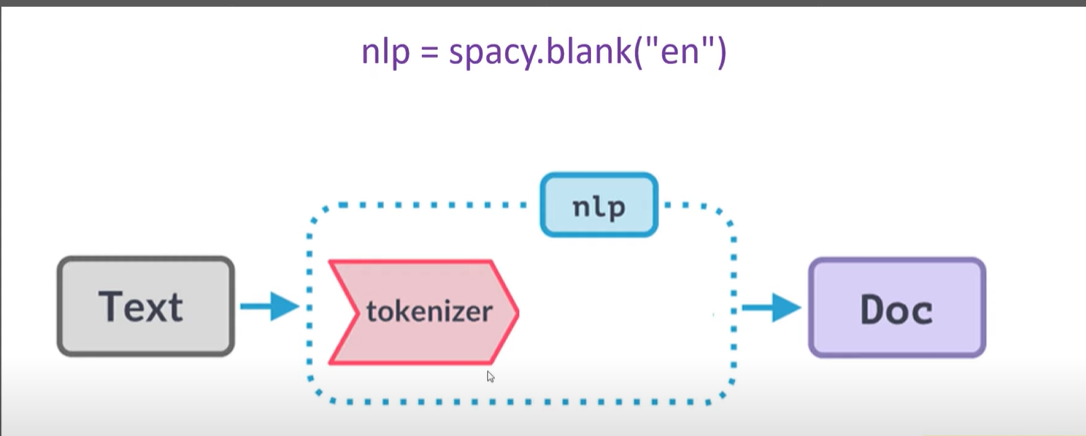

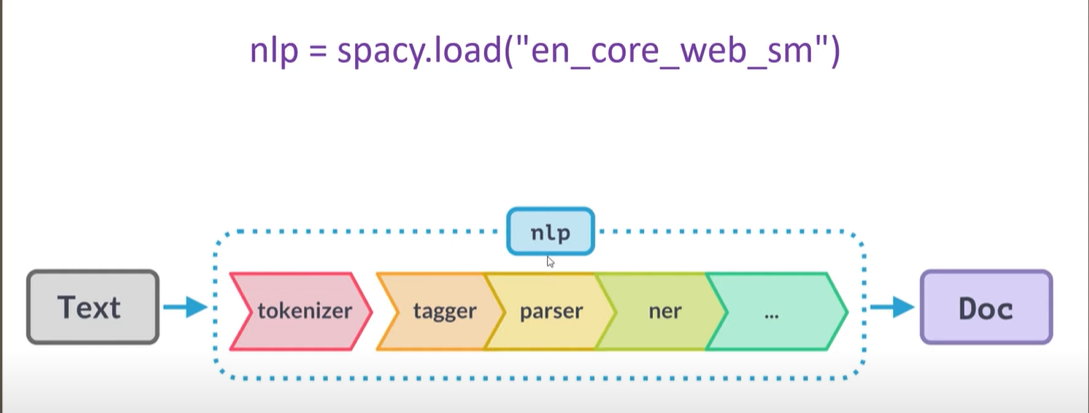

Given a paragraph from this book and you want to grab all urls from this paragraph using spacy

In [33]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''
detect_url=[]
doc=nlp(text)
for token in doc:
    if token.like_url:
        detect_url.append(token.text)
detect_url        

['http://www.data.gov/',
 'http://www.science',
 'http://data.gov.uk/.',
 'http://www3.norc.org/gss+website/',
 'http://www.europeansocialsurvey.org/.']

Extract all money transaction from below sentence along with currency. Output should be,

two $

500 €

In [46]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"
money_transactions=[]
doc=nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token.text, doc[token.i+1].text)
            

two $
500 €
